In [2714]:
import pandas as pd
import numpy as np

In [2715]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load and data on COVID cases

In [2716]:
death_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

confirmed_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

recovered_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [2717]:
death_cases=death_cases.groupby('Country/Region').sum()
death_cases.loc['World',:]=death_cases.sum(axis=0)
death_cases=death_cases.sort_values(death_cases.columns[-1])[::-1]

In [2718]:
confirmed_cases=confirmed_cases.groupby('Country/Region').sum()
confirmed_cases.loc['World',:]=confirmed_cases.sum(axis=0)
confirmed_cases=confirmed_cases.sort_values(death_cases.columns[-1])[::-1]

In [2719]:
recovered_cases=recovered_cases.groupby('Country/Region').sum()
recovered_cases.loc['World',:]=recovered_cases.sum(axis=0)

In [2720]:
confirmed_cases.drop(['Lat', 'Long'], axis=1, inplace=True)
death_cases.drop(['Lat', 'Long'], axis=1, inplace=True)
recovered_cases.drop(['Lat', 'Long'], axis=1, inplace=True)

In [2721]:
last_date=death_cases.columns[-1]

### Check death data for consistency 

In [2722]:
# check all values which are at least 5 times different from their neighbours

In [2480]:
def compare(a, b):
    if min(a,b)>10:
        if max(a,b)/min(a,b)>5:
            return 1
        else:
            return 0
    else:
        if max(a,b)-min(a,b)>30:
            return 1
        else:
            return 0

In [2724]:
[(daily_death_cases.index[i], daily_death_cases.columns[j], daily_death_cases.iloc[i,j-2], daily_death_cases.iloc[i,j-1], daily_death_cases.iloc[i,j]) 
 for i in range(1, daily_death_cases.shape[0]) for j in range(1, daily_death_cases.shape[1]) 
 if compare(daily_death_cases.iloc[i,j-1], daily_death_cases.iloc[i,j])==1]



[('US', '3/19/20', 23.0, 10.0, 82.0),
 ('Italy', '3/12/20', 168.0, 196.0, 0.0),
 ('Italy', '3/13/20', 196.0, 0.0, 439.0),
 ('Spain', '3/13/20', 19.0, 1.0, 78.0),
 ('Spain', '4/18/20', 607.0, 687.0, 41.0),
 ('Spain', '4/19/20', 687.0, 41.0, 410.0),
 ('France', '3/13/20', 15.0, 0.0, 31.0),
 ('France', '3/16/20', 12.0, 0.0, 58.0),
 ('France', '3/17/20', 0.0, 58.0, 0.0),
 ('France', '3/19/20', 0.0, 0.0, 95.0),
 ('United Kingdom', '3/16/20', 13.0, 0.0, 35.0),
 ('United Kingdom', '3/17/20', 0.0, 35.0, 0.0),
 ('Germany', '4/11/20', 258.0, 160.0, -31.0),
 ('Germany', '4/12/20', 160.0, -31.0, 286.0),
 ('Germany', '4/15/20', 172.0, 100.0, 510.0),
 ('China', '1/29/20', 26.0, 49.0, 2.0),
 ('China', '1/30/20', 49.0, 2.0, 38.0),
 ('China', '2/12/20', 107.0, 100.0, 5.0),
 ('China', '2/13/20', 100.0, 5.0, 252.0),
 ('China', '2/21/20', 113.0, 122.0, 0.0),
 ('China', '2/22/20', 122.0, 0.0, 205.0),
 ('China', '2/23/20', 0.0, 205.0, 2.0),
 ('China', '2/24/20', 205.0, 2.0, 150.0),
 ('China', '4/17/20', 1.0

In [2725]:
## correct the data based on https://www.worldometers.info/coronavirus
death_cases.loc['Ecuador', '4/5/20':'4/7/20']=220
death_cases.loc['Mexico', '4/23/20']=970

death_cases.loc['United Kingdom', '3/12/20':'3/20/20']=[10, 12, 21, 35, 55, 71, 104, 144, 177]

death_cases.loc['China', '2/12/20']=1259
death_cases.loc['China','2/22/20':'4/18/20']=death_cases.loc['China','2/22/20':'4/18/20'].shift(-1)
death_cases.loc['China','4/18/20']=death_cases.loc['China','4/17/20']
#1000 reported deaths in one single day averses the analysis of growth rates and peak
death_cases.loc['China', '4/16/20':]=death_cases.loc['China', '4/15/20']

death_cases.loc['US', '3/17/20']=121
death_cases.loc['US', '3/18/20']=171

death_cases.loc['Spain', '4/16/20']=19130
death_cases.loc['Spain', '4/17/20']=19478

death_cases.loc['Italy', '3/12/20']=1016

death_cases.loc['Germany', '4/11/20']=2871

#shift France data by one day
death_cases.loc['France', '3/9/20':'3/20/20']=[30, 33,48, 61,79,91,127,148,175,264,372,450]

death_cases.loc['China', '4/16/20':]=death_cases.loc['China', '4/15/20']

In [2726]:
active_cases=confirmed_cases-death_cases-recovered_cases

### Comparison with other infectious diseases

In [2436]:
death_causes=pd.read_csv('death causes.csv')

In [2437]:
# align country names between databases
death_causes=death_causes.rename(columns={'United States of America': "US", "Republic of Korea": "Korea, South"})

In [2438]:
for column in death_causes.columns[8:]:
    death_causes[column]=death_causes[column].replace('.', np.nan).astype(float)

In [2451]:
# choose top 10 countries as showcases
countries=list(death_cases.head(11)[1:].index)

In [2461]:
country='China'
data=death_causes[(death_causes['Unnamed: 5'].notnull())&(death_causes['Infectious']==1)&
            ((death_causes['Member State'].isnull()))][['Unnamed: 5', country]].sort_values(country,  na_position='first')[::-1].head(5)
    
data.iloc[:,-1]=np.round(data.iloc[:,-1]*1000/365, 1)
death_data=np.diff(death_cases.loc[country][2:])
value=np.round(np.mean(death_data[np.argmax(death_data)-3:np.argmax(death_data)+3]), 1)
data=data.append(pd.Series(["COVID19", value], name='covid', index=data.columns))
data=data.sort_values(country)[::-1]
cov_ind=list(data['Unnamed: 5'][::-1]).index('COVID19')

In [2464]:
np.diff(death_cases.loc[country])

array([1.60e+01, 1.40e+01, 2.60e+01, 4.90e+01, 2.00e+00, 3.80e+01,
       4.20e+01, 4.60e+01, 1.02e+02, 6.40e+01, 6.60e+01, 7.20e+01,
       7.00e+01, 8.50e+01, 8.70e+01, 1.00e+02, 1.07e+02, 1.00e+02,
       1.47e+02, 1.10e+02, 1.52e+02, 1.42e+02, 1.03e+02, 9.80e+01,
       1.39e+02, 1.13e+02, 1.22e+02, 0.00e+00, 2.07e+02, 1.50e+02,
       7.00e+01, 5.20e+01, 2.90e+01, 4.40e+01, 4.70e+01, 3.50e+01,
       4.20e+01, 3.30e+01, 3.60e+01, 3.20e+01, 2.90e+01, 2.80e+01,
       2.80e+01, 2.30e+01, 1.60e+01, 2.20e+01, 1.10e+01, 8.00e+00,
       1.30e+01, 1.00e+01, 1.40e+01, 1.30e+01, 1.10e+01, 8.00e+00,
       4.00e+00, 6.00e+00, 1.50e+01, 0.00e+00, 7.00e+00, 4.00e+00,
       6.00e+00, 5.00e+00, 3.00e+00, 5.00e+00, 4.00e+00, 1.00e+00,
       7.00e+00, 6.00e+00, 4.00e+00, 4.00e+00, 3.00e+00, 2.00e+00,
       0.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
       2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.29e+03,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

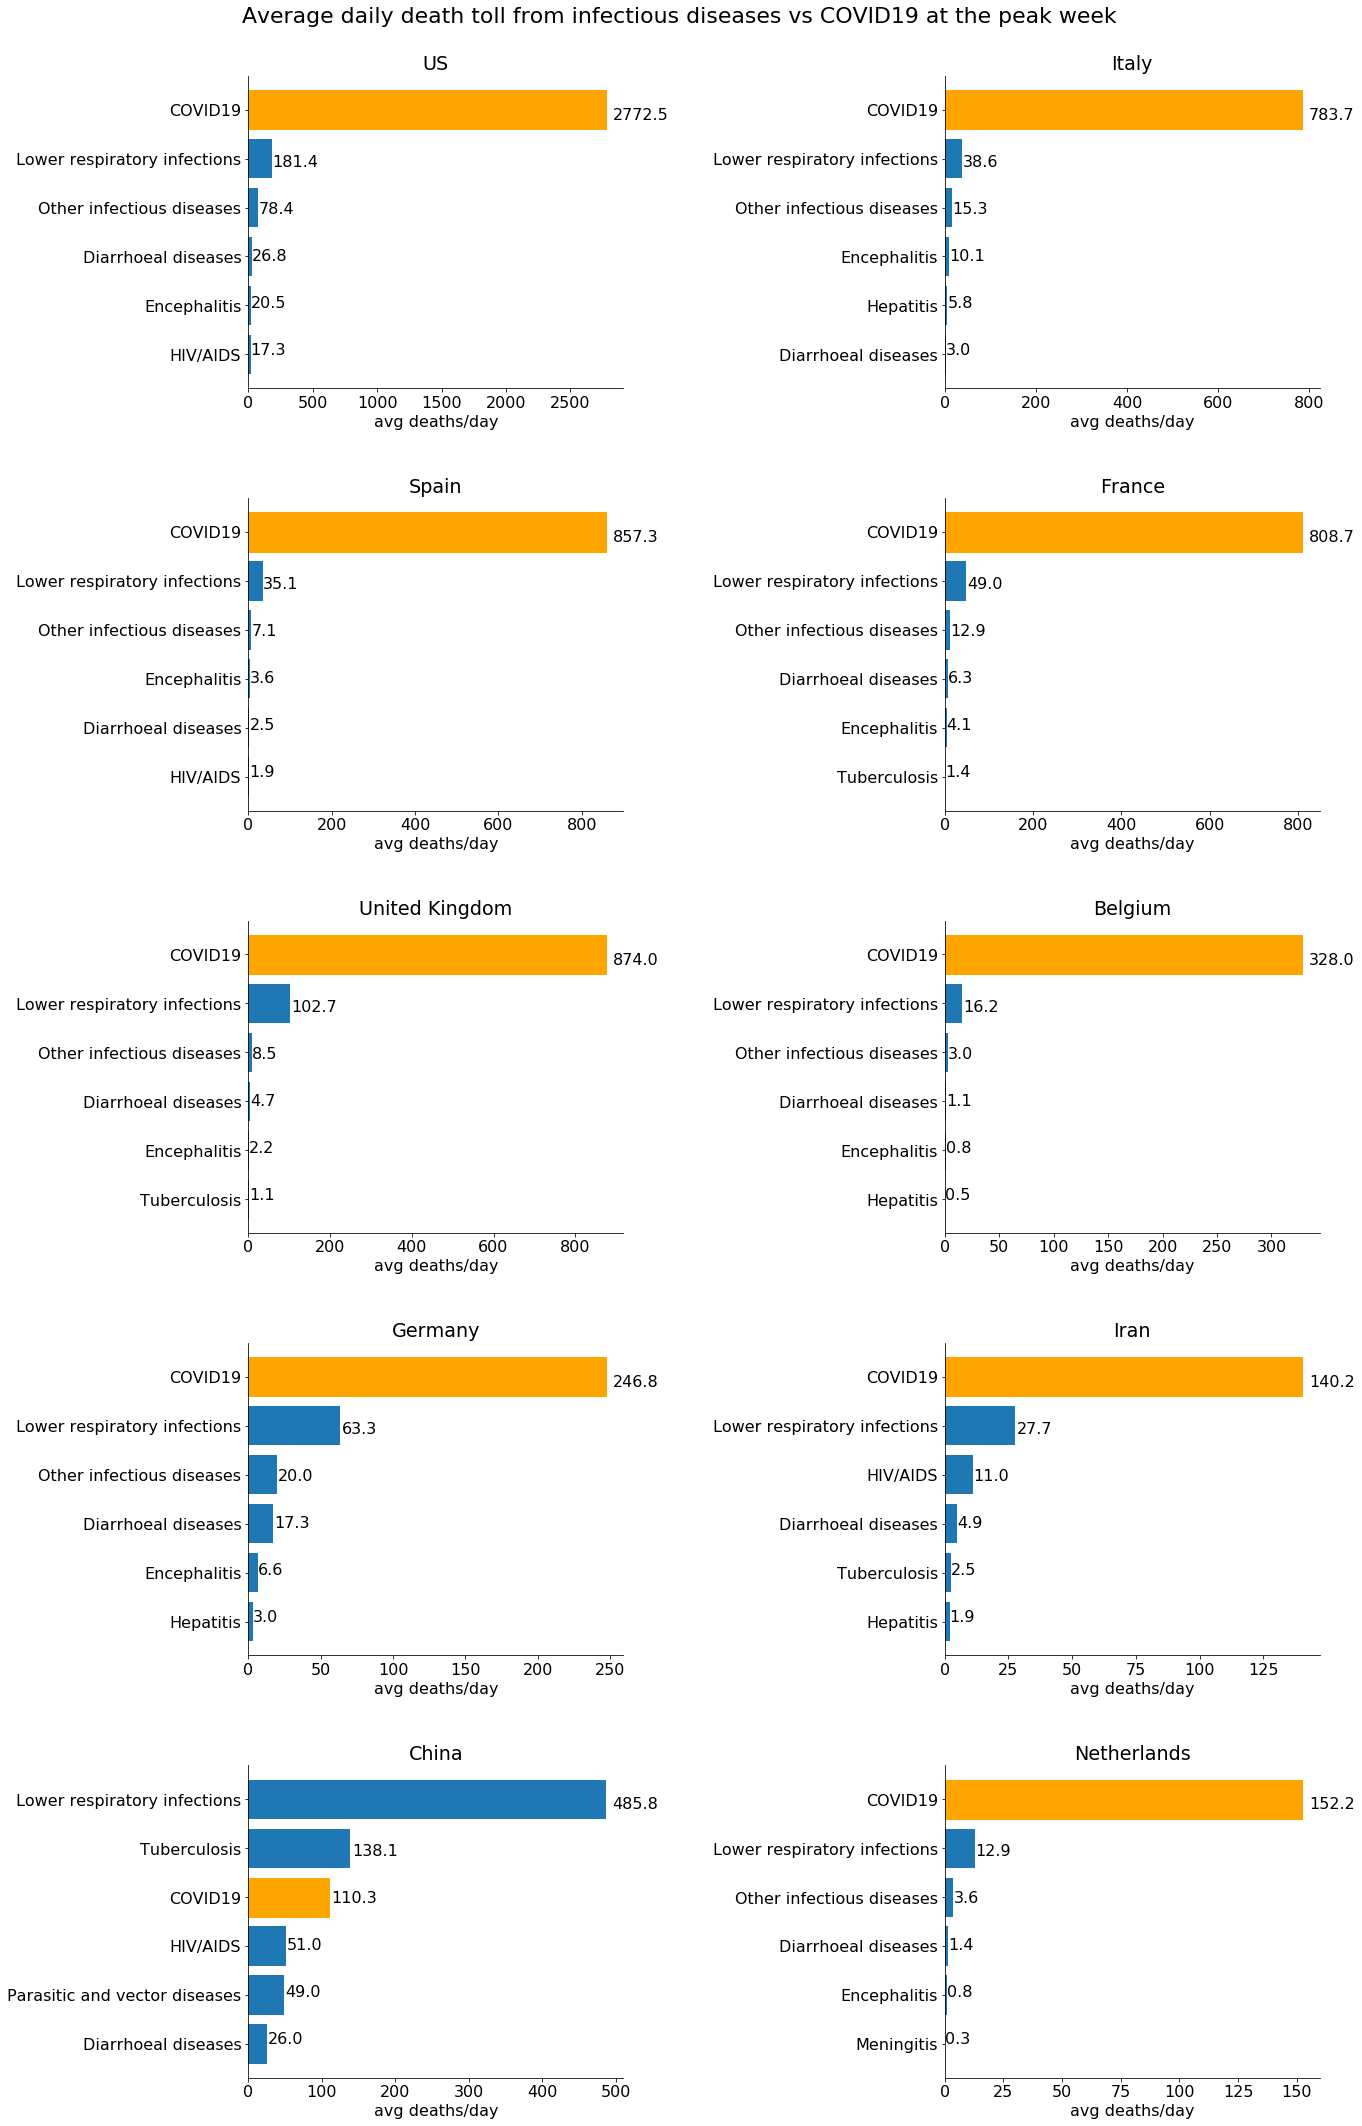

In [2469]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(2*10,5*6))

fig.suptitle('Average daily death toll from infectious diseases vs COVID19 at the peak week', size=22, y=1.0)
matplotlib.rcParams.update({'font.size': 16})


for k, country in enumerate(countries):    
    data=death_causes[(death_causes['Unnamed: 5'].notnull())&(death_causes['Infectious']==1)&
            ((death_causes['Member State'].isnull()))][['Unnamed: 5', country]].sort_values(country,  na_position='first')[::-1].head(5)
    
    data.iloc[:,-1]=np.round(data.iloc[:,-1]*1000/365, 1)
    
    death_data=np.diff(death_cases.loc[country][2:])
    value=np.round(np.mean(death_data[np.argmax(death_data)-3:np.argmax(death_data)+3]), 1)
    data=data.append(pd.Series(["COVID19", value], name='covid', index=data.columns))
    data=data.sort_values(country)[::-1]
    cov_ind=list(data['Unnamed: 5'][::-1]).index('COVID19')


    r=int(k/2)
    c=k % 2
    

    barlist=ax[r,c].barh(range(6), list(data.iloc[:,-1])[::-1])
    barlist[cov_ind].set_color('orange')
    ax[r,c].set_yticks(range(6))
    ax[r,c].set_yticklabels(list(data['Unnamed: 5'][::-1]))
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax[r,c].set_xlabel('avg deaths/day')
    ax[r,c].set_title(country)

    for i in range(6):
            ax[r,c].annotate(data.iloc[5-i,-1], xy=(data.iloc[5-i,-1]*1.02, i*0.96))

    ax[r,c].spines['top'].set_visible(False)
    ax[r,c].spines['right'].set_visible(False)    
    
plt.tight_layout(pad=3.0)
plt.show()

### Chart of daily death cases

In [2470]:
countries=list(death_cases.index[1:16])

In [2471]:
countries.append('Korea, South')

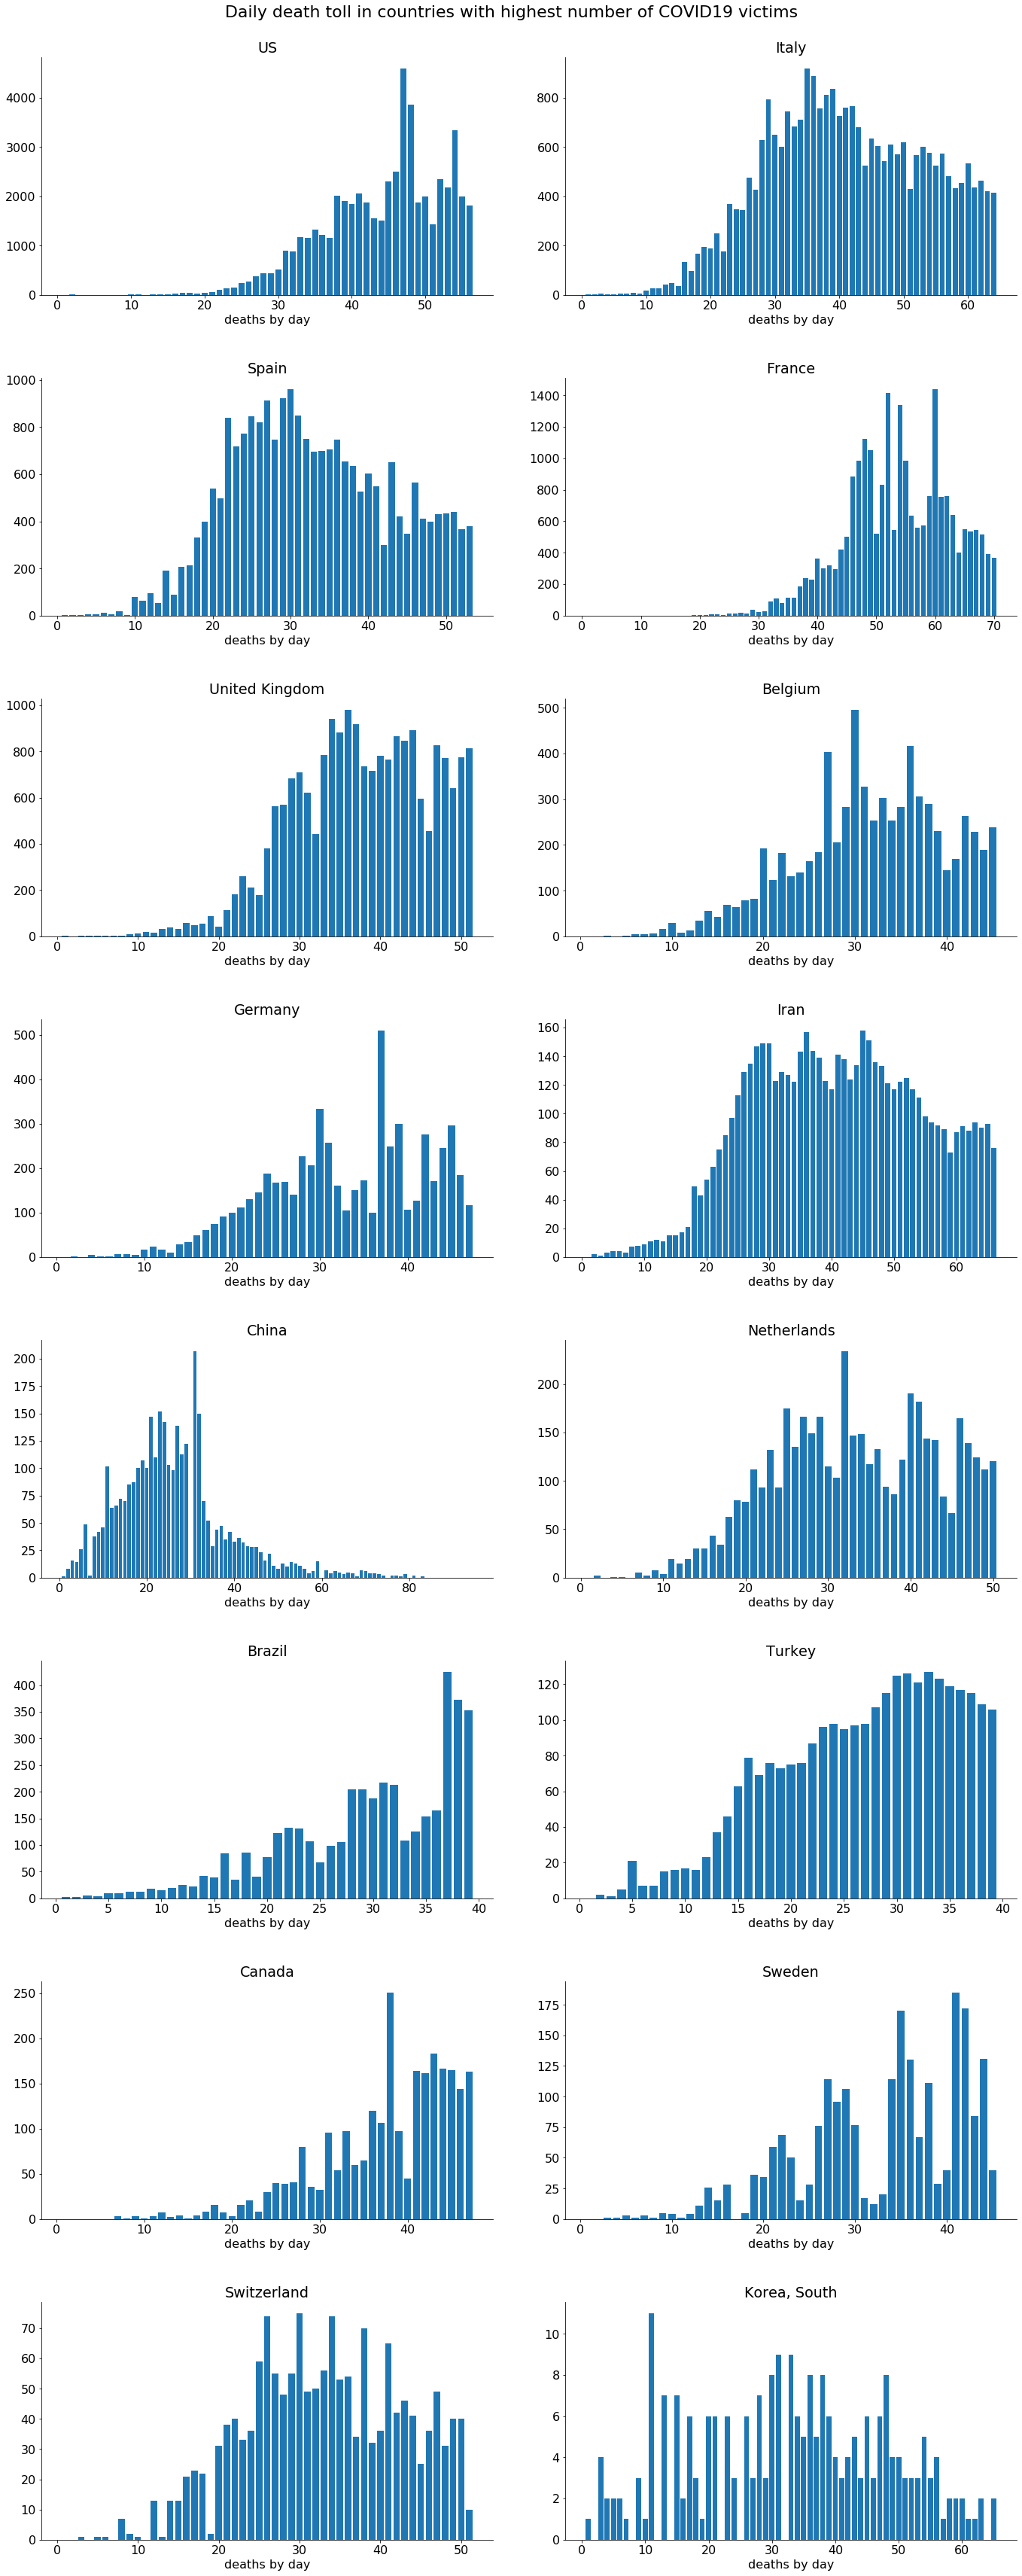

In [2472]:
fig, ax = plt.subplots(nrows=int(len(countries)/2), ncols=2, figsize=(2*10,len(countries)*3))

fig.suptitle('Daily death toll in countries with highest number of COVID19 victims', size=22, y=1.0)
matplotlib.rcParams.update({'font.size': 16})


for k, country in enumerate(countries): 
    death_data=death_cases.loc[country][death_cases.loc[country]>0]
    
    r=int(k/2)
    c=k % 2
    
    ax[r,c].bar(range(1, len(death_data)), np.diff(death_data))

   # ax[r,c].set_xticks(range(6))
   # ax[r,c].set_xticklabels(list(data['Unnamed: 5'][::-1]))
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax[r,c].set_xlabel('deaths by day')
    ax[r,c].set_title(country)

    ax[r,c].spines['top'].set_visible(False)
    ax[r,c].spines['right'].set_visible(False)    
    
plt.tight_layout(pad=3.0)
plt.show()

### How many days it took in various countries to reach each number of deaths since the first 100 cases

In [2728]:
countries=list(death_cases.index[1:11])

In [2729]:
countries.extend(['Poland', 'Russia', 'Norway', 'Korea, South'])

In [2730]:
#output_file("number_cases_double.html")
reset_output()
output_notebook()

series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

p = figure(plot_width=740, plot_height=550,  x_axis_type="log", x_range=[10, 60*10**3], y_range=[0, 60])


p.title.text = '# of days to reach the particular # of deaths since the first 10 cases'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'),('# of cases', '@x'), ('# of days', '@y'), ('date', '@dates')]))
p.xaxis.axis_label = '# of deaths (log scale)'

# add a line renderer
for i, country in enumerate(countries):
    series_x=series[series.country==country] 
    series_x=series_x.drop_duplicates()
    series_x=series_x.reset_index()
    start_ind=series_x[series_x.number>10].index[0]
    
    source = ColumnDataSource(data=dict(
    x=list(series_x[start_ind:]['number']),
    y=list(range(len(series_x[start_ind:]))),
    country=list(series_x[start_ind:]['country']),
    dates=series_x[start_ind:]['date']    
    ))
    
    p.circle('x', 'y', source=source, color=Category20[20][i], line_width=2, legend_label=country)
    p.line('x', 'y', source=source, line_width=2,color=Category20[20][i],
          alpha=0.7, hover_line_alpha=1.0, hover_line_width=8.0)  
    

p.legend.location = "top_left"

# items = []
# for i, x in enumerate(countries):
#      items += [(x,[p.circle(color=Category20[20][i])])]
    
# p.add_layout(Legend(items=items),'right')



show(p)


Loading BokehJS ...

#### continents

In [2731]:
continents.loc['Poland', 'Hungary', 'Romania', 'Ukraine', 'Russia', 'Lithuania', 'Latvia', 'Estonia', 'Moldova', 'Czechia',
  'North Macedonia','Montenegro', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Belarus',  
               'Serbia', 'Slovakia', 'Slovenia']='Eastern Europe'

In [2732]:
continents.loc['Sweden', 'Finland', 'Norway', 'Denmark', "Finland", 'Iceland']='Nothern Europe'

In [2733]:
continents.loc['Tajikistan', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Armenia', 'Azerbaijan','Turkey',
         'United Arab Emirates', 'Oman', 'Iran', 'Iraq', 'Israel','Jordan', 'Bahrain', 'Saudi Arabia','Syria' , 'Kuwait']='West and Central Asia'

In [2735]:
death_cases_continents=death_cases.copy()

In [2736]:
death_cases_continents['continents']=pd.Series([continents.loc[country] 
                                               if country in continents.index else np.nan
                                               for country in death_cases_continents.index], index=death_cases_continents.index)

In [2737]:
death_cases_continents=death_cases_continents.groupby('continents').sum()

In [2738]:
death_cases_continents.index

Index(['Africa', 'Asia', 'Eastern Europe', 'Europe', 'North America',
       'Nothern Europe', 'Oceania', 'South America', 'West and Central Asia'],
      dtype='object', name='continents')

In [2746]:
#output_file("number_cases_double_continents.html")
output_notebook()

series=death_cases_continents.transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'continent', 'number']

p = figure(plot_width=740, plot_height=550,  x_axis_type="log", x_range=[10, 110*10**3], y_range=[0, 60])


p.title.text = '# of days to reach the particular # of deaths since the first 10 cases'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('continent', '@continent'),('# of cases', '@x'), ('# of days', '@y'), ('date', '@dates')]))
p.xaxis.axis_label = '# of deaths (log scale)'

# add a line renderer
for i, continent in enumerate(death_cases_continents.index):
    series_x=series[series.continent==continent] 
    series_x=series_x.drop_duplicates()
    series_x=series_x.reset_index()
    start_ind=series_x[series_x.number>10].index[0]
    
    source = ColumnDataSource(data=dict(
    x=list(series_x[start_ind:]['number']),
    y=list(range(len(series_x[start_ind:]))),
    continent=list(series_x[start_ind:]['continent']),
    dates=series_x[start_ind:]['date']    
    ))
    
    p.circle('x', 'y', source=source, color=Category10[10][i], line_width=2, legend_label=continent)
    p.line('x', 'y', source=source, line_width=2,color=Category10[10][i],
          alpha=0.7, hover_line_alpha=1.0, hover_line_width=8.0)  
    

p.legend.location = "top_left"

# items = []
# for i, x in enumerate(countries):
#      items += [(x,[p.circle(color=Category20[20][i])])]
    
# p.add_layout(Legend(items=items),'right')



show(p)


Loading BokehJS ...

## Analysis of the COVID spread dynamics: how many days it took for the number of deaths to double

In [31]:
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource, ranges, LabelSet
from bokeh.models.tools import HoverTool

In [32]:
from bokeh.palettes import Category10, Category20
from bokeh.models import Legend
import bokeh.io
from bokeh.io import output_notebook, output_file 
from bokeh.io import reset_output

In [33]:
from collections import OrderedDict

In [34]:
def doubling(x):
    start=[i for i in range(len(x)) if x[i]>100][0]
    y=[[i-j for j in range(len(x)) if x[j]<=x[i]/2][-1] for i in range(start, len(x))]
    return [0]*start+y

In [2487]:
doubling_period=pd.DataFrame([doubling(top_death_cases.iloc[k, 4:]) for k in range(top_death_cases.shape[0])], index=top_death_cases.index, columns=top_death_cases.columns[4:])

In [2491]:
reset_output()

In [2747]:
#output_file("world_cases_double.html")
output_notebook()
series=doubling_period.loc['World']
series=series[series>0]
#output_file("world_cases_double.html")
p = figure(plot_width=800, plot_height=550, x_axis_type="datetime")

p.title.text = '# of days it took for the # of COVID death cases to double in the World'
dates=pd.to_datetime(series.index, format='%m/%d/%y', errors='ignore')
p.add_tools(HoverTool(line_policy='nearest', tooltips=[('date', '@x{%F}'), ('# of days','@y')], formatters={'@x': 'datetime'}))

# add a line renderer
#p.circle(dates, list(series), color=Category10[10][0], line_width=2)
p.line(list(dates), list(series), color=Category10[10][0], line_width=2)

show(p)

Loading BokehJS ...

### Percentage of fatalities grows with the number of total confirmed cases

In [2740]:
countries=list(death_cases.index[1:9])
countries.append('Korea, South')

In [2741]:
from bokeh.models import NumeralTickFormatter

In [2742]:
#### Correct fatality - active cases by that date

In [2743]:
fatality_active=pd.DataFrame([[(death_cases.loc[countries].iloc[j,i+14]-death_cases.loc[countries].iloc[j,i])/active_cases.loc[countries].iloc[j,i]              
                             for i in range(death_cases.loc[countries].shape[1]-14)]
                                  for j in range(death_cases.loc[countries].shape[0])], columns=death_cases.columns[:-14],
            index=countries)

C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [2744]:
# Create stacked dataset
series=active_cases.loc[countries].iloc[:,:-14].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'active cases']
series['fatality active']=pd.Series([fatality_active.loc[series['country'][i],series['date'][i]]
                                    for i in range(series.shape[0])], name='fatality active')


In [2745]:
#output_file("fatality vs active cases.html")
output_notebook()

p = figure(plot_width=740, plot_height=550,  x_axis_type="log", y_axis_type="log")

p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'), ('# of active cases, K', '@x'), ('fatality rate', '@y{1.1%}'),
                               ('date','@dates{%F}')], 
                      formatters={'@dates': 'datetime'}))


p.yaxis.formatter = NumeralTickFormatter(format='0 %')
p.xaxis.axis_label = 'Active cases, K'
p.yaxis.axis_label = 'Death rate within 2 weeks, %'


for i, country in enumerate(countries):
    series_c=series[series.country==country]
    series_c.index=range(series_c.shape[0])
    start_date=series_c[series_c['active cases']>100].index[0]
    dates=list(series_c.loc[start_date:, 'date'])  
    dates=[pd.to_datetime(x, format='%m/%d/%y') for x in dates]
    
    source = ColumnDataSource(data=dict(
    x=list(series_c.loc[start_date:, 'active cases']),
    y=list(series_c.loc[start_date:, 'fatality active']),
    country=list(series_c.loc[start_date:, 'country']),
    dates=dates  
    ))
    
    p.circle('x', 'y', source=source, color=Category10[10][i], line_width=2)
    p.line('x', 'y', source=source, line_width=2, 
           legend_label=country, color=Category10[10][i],
          alpha=0.7, hover_line_alpha=1.0, hover_line_width=8.0)  

p.legend.location = "top_right"
show(p)

Loading BokehJS ...

## How the previous number corresponds with the stringency and lockdown

In [426]:
from bokeh.models import LinearColorMapper

In [427]:
import datetime

In [1557]:
stringency=pd.read_csv('../OxCGRT_Download_180420_124239_Full.csv')

In [1559]:
stringency['Date']=pd.Series([str(str(int(str(x)[4:6]))+'/'+str(int(str(x)[6:]))+'/'+str(x)[2:4]) for x in list(stringency['Date'])], index=stringency.index)

In [1560]:
stringency.CountryName.replace('United States', 'US', inplace=True)

In [1561]:
stringency.CountryName.replace('South Korea', 'Korea, South', inplace=True)

### Stringency explanation

In [ ]:
limits=[20, 40, 60, 80]

In [1915]:
from bokeh.models.widgets import DataTable, TableColumn, HTMLTemplateFormatter
from bokeh.layouts import widgetbox

In [1919]:
stringency.columns

Index(['CountryName', 'CountryCode', 'Date', 'S1_School closing',
       'S1_IsGeneral', 'S1_Notes', 'S2_Workplace closing', 'S2_IsGeneral',
       'S2_Notes', 'S3_Cancel public events', 'S3_IsGeneral', 'S3_Notes',
       'S4_Close public transport', 'S4_IsGeneral', 'S4_Notes',
       'S5_Public information campaigns', 'S5_IsGeneral', 'S5_Notes',
       'S6_Restrictions on internal movement', 'S6_IsGeneral', 'S6_Notes',
       'S7_International travel controls', 'S7_Notes', 'S8_Fiscal measures',
       'S8_Notes', 'S9_Monetary measures', 'S9_Notes',
       'S10_Emergency investment in health care', 'S10_Notes',
       'S11_Investment in Vaccines', 'S11_Notes', 'S12_Testing framework',
       'S12_Notes', 'S13_Contact tracing', 'S13_Notes', 'ConfirmedCases',
       'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay',
       'Unnamed: 39'],
      dtype='object')

In [1940]:
level1=stringency[(stringency.StringencyIndex>=20)&(stringency.StringencyIndex<=40)]\
[['S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S4_Close public transport', 'S6_Restrictions on internal movement',
 'S7_International travel controls']].mean()

In [1944]:
level2=stringency[(stringency.StringencyIndex>40)&(stringency.StringencyIndex<=60)]\
[['S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S4_Close public transport', 'S6_Restrictions on internal movement',
 'S7_International travel controls']].mean()
level3=stringency[(stringency.StringencyIndex>60)&(stringency.StringencyIndex<=80)]\
[['S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S4_Close public transport', 'S6_Restrictions on internal movement',
 'S7_International travel controls']].mean()
level4=stringency[(stringency.StringencyIndex>80)]\
[['S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S4_Close public transport', 'S6_Restrictions on internal movement',
 'S7_International travel controls']].mean()

In [1962]:
level1

S1_School closing                       0.233803
S2_Workplace closing                    0.044366
S3_Cancel public events                 0.335447
S4_Close public transport               0.040141
S6_Restrictions on internal movement    0.179450
S7_International travel controls        2.263380
dtype: float64

In [2545]:
stringency_summary=pd.concat([level1, level2, level3, level4], axis=1).transpose()
stringency_summary=pd.concat([pd.Series(['>20', '>40', '>60', '>80']), stringency_summary], axis=1)
#stringency_summary.index=['>20', '>40', '>60', '>80']
stringency_summary.columns=['Stringency index', 'School closing', 'Workplace closing', 'Cancel public events', 'Close public transport', 
                            'Restrictions on internal movement',
 'International travel controls']

In [2546]:
stringency_summary=stringency_summary.round(1)

In [1974]:
stringency_summary

Stringency index  School closing  Workplace closing  Cancel public events  \
0              >20             0.2                0.0                   0.3   
1              >40             1.5                0.3                   1.5   
2              >60             1.9                1.1                   1.9   
3              >80             2.0                1.8                   2.0   

   Close public transport  Restrictions on internal movement  \
0                     0.0                                0.2   
1                     0.2                                0.5   
2                     0.6                                1.5   
3                     1.4                                1.9   

   International travel controls  
0                            2.3  
1                            2.3  
2                            2.5  
3                            2.9

In [2790]:
def return_peak(country):
    if len(daily_death_cases.loc[country])-np.argmax(daily_death_cases.loc[country])>=7:
        return daily_death_cases.loc[country].index[np.argmax(daily_death_cases.loc[country])]
    else:
        return daily_death_cases.columns[-1]

In [2791]:
def return_stringency(country):
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date')
    country_list['deaths']=pd.Series([death_cases.loc[country, date]
                                 if date in death_cases.columns else np.nan
                                  for date in country_list.index], index=country_list.index)
    
    return country_list

In [2792]:
def stringency_dates(country):
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date')
    values=np.unique(country_list[~np.isnan(country_list)])
    values=values[values>0]
    peak_date=return_peak(country)
      
    peak_num=daily_death_cases.loc[country, peak_date]
    
    peak_date=pd.to_datetime(peak_date, format='%m/%d/%y') 
    dates=[country_list.index[list(country_list['StringencyIndex']).index(value)] for value in values]
    dates=[date for date in dates if pd.to_datetime(date, format='%m/%d/%y')<peak_date]
    dates_deaths=[death_cases.loc[country, date] if date in death_cases.columns else 0 for date in dates]
    values=country_list.loc[dates]
    dates=[pd.to_datetime(date, format='%m/%d/%y') for date in dates]  
    
    return list(values['StringencyIndex']), [(peak_date-date).days for date in dates], dates, peak_date, peak_num

In [2793]:
def stringency_growth_rate(country):
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date')
    
    dates=[country_list.index[list(country_list['StringencyIndex']).index(value)] for value in values]
    dates=[date for date in dates if pd.to_datetime(date, format='%m/%d/%y')<peak_date]
    dates_deaths=[death_cases.loc[country, date] if date in death_cases.columns else 0 for date in dates]
    
    values=country_list.loc[dates]
    dates=[pd.to_datetime(date, format='%m/%d/%y') for date in dates] 
    
    week_growth=[return_function2(date) for date in dates]
    
    return list(values['StringencyIndex']), week_growth, dates, dates_deaths

#### stringency measures at each # of deaths

In [2554]:
countries=['Italy', 'Spain', 'France', 'US', 'Canada',  
           'United Kingdom', 'China', 'Korea, South', "Germany", "Sweden"]

In [2556]:
output_file("stringency_vs_deaths.html")
series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

p = figure(plot_width=740, plot_height=550, x_axis_type="log")


p.title.text = 'stringency level vs total number of deaths by that date'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'), ('stringency_index', '@y'), 
                                ('date of stringency','@dates{%F}'), ('# of deaths', '@x{1.1}')],
                     formatters={'@dates': 'datetime'}))


p.xaxis.axis_label = 'n deaths'
p.yaxis.axis_label = 'stringency index'
i=0
# add a line renderer
for i, country in enumerate(countries):
    country_data = return_stringency(country)  
    country_data=country_data[country_data['deaths']>10]
    
    source = ColumnDataSource(data=dict(
    x=country_data['deaths'],
    y=country_data['StringencyIndex'],
    dates=[pd.to_datetime(x, format='%m/%d/%y') for x in country_data.index],     
    country=[country]*country_data.shape[0],
    ))
    
    p.circle('x', 'y', source=source, color=Category10[10][i], alpha=0.7,
              hover_alpha=1.0, legend_label=country, hover_width=10, size=6)
    p.line('x', 'y', source=source, color=Category10[10][i], alpha=0.7,
              hover_alpha=1.0)       
        

p.legend.location = "bottom_right"
show(p)


#### stringency index vs number of days till slowdown

In [2805]:
output_file("stringency_vs_slowdown.html")
countries=list(death_cases.index[1:18])
countries.extend(['Japan', 'Korea, South'])
series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

p = figure(plot_width=740, plot_height=550)


p.title.text = '# of days from introduction of restrictions till deaths slowdown in countries'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'), ('stringency_index', '@y'), 
                                ('date of stringency','@dates{%F}'), ('peak_date', '@peak_dates{%F}'), ('number of days', '@x'), ('peak daily deaths', '@peak_num{1}')],
                     formatters={'@dates': 'datetime', '@peak_dates': 'datetime'}))


p.xaxis.axis_label = '# of days till deaths slowdown'
p.yaxis.axis_label = 'stringency index'
i=0
# add a line renderer
items = []
for country in countries:
    score, days_before, dates, peak_date, peak_num = stringency_dates(country)  
        
    source = ColumnDataSource(data=dict(
    x=days_before,
    y=score,
    country=[country]*len(days_before),
    peak_dates=[peak_date]*len(days_before),
    peak_num=[peak_num]*len(days_before),
    dates=dates   
    
    ))
    
    if peak_date!=pd.to_datetime(daily_death_cases.columns[-1], format='%m/%d/%y'):
        p.circle('x', 'y', source=source, color=Category20[20][i],
             size=8, hover_alpha=1.0,  hover_width=10) 
        items += [(country,[p.scatter(color=Category20[20][i])])]
        
    else:
         p.scatter('x', 'y', marker='circle_x', source=source, color=Category20[20][i], 
                   size=10, hover_alpha=1.0, hover_width=10)
        
         items += [(country,[p.scatter(color=Category20[20][i], marker='circle_x')])]
    i+=1
         
     
    
items += [('peak not reached',[p.scatter(color='grey', marker='circle_x')])]

p.add_layout(Legend(items=items, location=(0, 0)),'right')

show(p)


C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [2799]:
score, days_before, dates, peak_date, peak_num = stringency_dates('Sweden')  

C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [2800]:
peak_date

Timestamp('2020-04-24 00:00:00')

In [2803]:
daily_death_cases.columns[-1]

'4/24/20'

In [2801]:
pd.to_datetime(death_cases.columns[-1], format='%m/%d/%y')

Timestamp('2020-04-28 00:00:00')

In [2798]:
peak_date

Timestamp('2020-03-02 00:00:00')

### Days between <20 stringency measures and slowdown in deaths number, vs how fast stricter measures were imposed (>60)

In [2558]:
def stringency_dates_20_60(country):
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date') 
    try:
        values=[country_list[country_list['StringencyIndex']<20].iloc[-1,0], 
        country_list[country_list['StringencyIndex']>60].iloc[0,0]]
        dates=[country_list[country_list['StringencyIndex']<20].index[-1], 
        country_list[country_list['StringencyIndex']>60].index[0]]
    except:
        values=[country_list[country_list['StringencyIndex']<20].iloc[-1,0], 
        np.max(country_list)[0]]
        dates=[country_list[country_list['StringencyIndex']<20].index[-1], 
        country_list[country_list['StringencyIndex']==np.max(country_list)[0]].index[0]]
        
    peak_date=return_peak(country)
    peak_date=pd.to_datetime(peak_date, format='%m/%d/%y') 
    dates_deaths=[death_cases.loc[country, date] if date in death_cases.columns else 0 for date in dates]
    dates=[pd.to_datetime(date, format='%m/%d/%y') for date in dates]   
    
    return values, (dates[1]-dates[0]).days, (peak_date-dates[0]).days, dates, peak_date, peak_num

In [2560]:
output_file("20_vs_60_slowdown.html")
countries=list(death_cases.index[1:18])
countries.extend(['Japan', 'Korea, South'])
series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

p = figure(plot_width=740, plot_height=550, y_range=[20, 70])


p.title.text = 'Days between <20 stringency measures and slowdown in deaths number, vs how fast stricter measures were imposed (>60)'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'), 
                                ('date of stringency','@dates{%F}'), ('peak_date', '@peak_dates{%F}'), 
                                ('days from mild to strict measure', '@x'), ('days from lockdown to deaths slowdown', '@y'),
                                ('stringency index', '@score')],
                                 
                      formatters={'@dates': 'datetime', '@peak_dates': 'datetime'}))


p.xaxis.axis_label = '# days between mild (<20) and strict (>60) measures'
p.yaxis.axis_label =  '# days from mild measures (index <20) till # of deaths decrease'

score_all=[]
days_between_all=[]
days_before_all=[]
dates_all=[]
peak_date_all=[]
peak_num_all=[]
country_all=[]

# add a line renderer
for country in countries:
    score, days_between, days_before, dates, peak_date, peak_num = stringency_dates_20_60(country)  
    if peak_date!=pd.to_datetime(last_date, format='%m/%d/%y'):
        score_all.append(score[1])
        days_between_all.append(days_between)
        days_before_all.append(days_before)
        dates_all.append(dates[1])
        peak_date_all.append(peak_date)
        peak_num_all.append(peak_num)
        country_all.append(country)

source = ColumnDataSource(data=dict(
    x=days_between_all,
    y=days_before_all,
    country=country_all,
    peak_dates=peak_date_all,
    dates=dates_all,
    score=score_all,
    color=Category20[20][:len(country_all)]
    
    ))
    
p.circle('x', 'y', source=source, color='color', 
             size=8, hover_alpha=1.0, hover_width=10) 
        

items = []
for i, x in enumerate(country_all):
     items += [(x,[p.circle(color=Category20[20][i])])]
    
p.add_layout(Legend(items=items),'right')


show(p)


### Other charts on stringency

In [218]:
def time_to_str(x):
    a=str(x)
    a=a.split('-')
    return str(int(a[1]))+'/'+str(int(a[2].split(' ')[0]))+'/'+a[0][2:]

In [2806]:
def stringency_dynamic(country):
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date')
    country_list=country_list.fillna(method='ffill')
    
    peak_date=daily_death_cases.loc[country].index[np.argmax(daily_death_cases.loc[country])]
    
    #value=np.max(country_list[:peak_date])[0]
    try:
        date=country_list[country_list.StringencyIndex>60].iloc[0].name
        
    except:
        try:
            date=country_list.index[np.argmax(country_list.iloc[:peak_date])]
        except: #if the peak_date is in the last days which are not in Oxford dataset
            date=country_list.index[np.argmax(country_list)]
    
    
    #date=country_list.index[np.argmax(country_list[:peak_date])]
    #date=country_list.index(value)
    dates=pd.to_datetime(daily_death_cases.loc[country, date:country_list.index[-1]].index, format='%m/%d/%y') 
    values=country_list.loc[date:]
    
    date_deaths=daily_death_cases.loc[country, date:country_list.index[-1]]
    
    date=pd.to_datetime(date, format='%m/%d/%y')     
    dates_growth=[np.mean(return_function1(date, k-2, k+2)) for k in range(len(country_list[time_to_str(date):]))]
    
    return list(values['StringencyIndex']), dates_growth, dates, list(date_deaths)

In [2808]:
#output_file("stringency_vs_growth_rate.html")
output_notebook()
countries=list(death_cases.index[1:15])
countries.remove('Iran')
countries.extend(['Korea, South', 'Japan'])
series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

p = figure(plot_width=740, plot_height=550, y_axis_type='log', x_range=[0, 55], y_range=[1, 5000])


p.title.text = '# of days in a day since '
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'), ('stringency_index', '@scores'), 
                                ('date','@dates{%F}'), ('5-day avg # of deaths', '@y{1.1}')],
                     formatters={'@dates': 'datetime'}))


p.yaxis.axis_label = 'number of deaths in a day (5-day mean) since lockout'
p.xaxis.axis_label = 'days from lockout'

# add a line renderer
for i, country in enumerate(countries):
    scores, dates_growth, dates, date_deaths = stringency_dynamic(country)  
        
    source = ColumnDataSource(data=dict(
    scores=scores,
    size=[x**2/1000 for x in scores],
    x=range(len(dates_growth)),
    y=dates_growth,
    dates=dates,     
    deaths=date_deaths,
    country=[country]*len(dates_growth),
    ))
    
    p.circle('x', 'y', source=source, color=Category20[20][i], alpha=0.7,
              hover_alpha=1.0, hover_width=10, size='size')
    p.line('x', 'y', source=source, color=Category20[20][i], alpha=0.7,
              hover_alpha=1.0)
        
        
   # else:
   #      p.scatter('x', 'y', marker='circle_x', source=source, color=Category10[10][i],
   #          size=8, hover_alpha=1.0, legend_label=country, hover_width=10)

#p.legend.location = "top_right"

items = []
for i, x in enumerate(countries):
    items += [(x,[p.circle(color=Category20[20][i])])]
    
p.add_layout(Legend(items=items),'right')

show(p)


Loading BokehJS ...

### How the rank in the number of deaths changed

In [2565]:
## number of deaths at the time of restrictions vs number of deaths in 30 days
def death_rank(country):
    
    country_list=stringency[stringency.CountryName==country][['Date','StringencyIndex']]
    country_list=country_list.set_index('Date')
    country_list=country_list.fillna(method='ffill')
    
    peak_date=daily_death_cases.loc[country].index[np.argmax(daily_death_cases.loc[country])]
    
    #value=np.max(country_list[:peak_date])[0]
    try:
        date=country_list[country_list.StringencyIndex>60].iloc[0].name
        
    except:
        try:
            date=country_list.index[np.argmax(country_list.iloc[:peak_date])]
        except: #if the peak_date is in the last days which are not in Oxford dataset
            date=country_list.index[np.argmax(country_list)]
    
    next_date=pd.to_datetime(date, format='%m/%d/%y')+datetime.timedelta(days=30)
    if next_date<=pd.to_datetime(last_date, format='%m/%d/%y'):
        next_date=time_to_str(next_date)
    else:
        next_date=last_date
        
    return date, next_date, country_list.loc[date][0]
    #print(country, date, death_cases.loc[country, date], next_date, death_cases.loc[country, next_date])

In [2566]:
output_file("stringency_deaths_rank.html")
countries=list(death_cases.index[1:15])
countries.remove('Iran')
countries.extend(['Korea, South', 'Japan'])


p = figure(plot_width=740, plot_height=550, y_axis_type='log',  x_range=[0, 1], y_range=[1, 40000])


p.title.text = '# of days to reach the particular # of deaths since the first 100 cases'
p.add_tools(HoverTool(line_policy='next', 
                      tooltips=[('country', '@country'), ('stringency_index', '@scores'), 
                                ('total # of deaths in 30 days', '@y'),
                               ('total # of deaths in the beggining', '@deaths_start')],
                     formatters={'@dates': 'datetime'}))


p.yaxis.axis_label = 'number of deaths'
p.xaxis.axis_label = '30 days from lockout'

# add a line renderer
for i, country in enumerate(countries):
    date, next_date, score = death_rank(country)  
        
    source = ColumnDataSource(data=dict(
    scores=[score]*2,
    x=range(2),
    y=[death_cases.loc[country,date], death_cases.loc[country,next_date]],
    deaths_start=[death_cases.loc[country,date]]*2,
    dates=[date, next_date],   
    country=[country]*2
    ))
    
    p.line('x', 'y', source=source, width=4, color=Category20[20][i], alpha=0.7,
              hover_alpha=1.0, hover_width=8)
        
        
   # else:
   #      p.scatter('x', 'y', marker='circle_x', source=source, color=Category10[10][i],
   #          size=8, hover_alpha=1.0, legend_label=country, hover_width=10)

#p.legend.location = "top_right"

items = []
for i, x in enumerate(countries):
    items += [(x,[p.circle(color=Category20[20][i])])]
    
p.add_layout(Legend(items=items),'right')

show(p)

### Number of test by date vs number of deaths

In [2576]:
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider, ranges

In [2768]:
world_test=pd.read_csv('../tests-per-thousand.csv')

date_dict={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5}
world_test['Date']=pd.Series([str(str(date_dict[x[:3]])+"/"+x[4:6]+'/20').replace(",","") 
                              for x in list(world_test['Date'])])

world_test=world_test.replace('South Korea', 'Korea, South')
world_test=world_test.replace('United States', 'US')

In [2769]:
countries_selected=[x for x in np.unique(world_test.Entity) if x in death_cases.index[:25]]
countries_selected.append('Korea, South')

In [2770]:
countries_selected.remove('India')

In [2771]:
def return_tests(country, date):
    try:
         return world_test[(world_test.Entity==country)&(world_test.Date==date)]['Cumulative total tests per thousand'].iloc[0]
    except: return np.nan

In [2772]:
series=death_cases.loc[countries_selected].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

series_x_all=pd.DataFrame()
series_str_all=pd.Series()

for i, country in enumerate(countries_selected):
    series_x=series[series.country==country]    
    series_x=series_x.drop_duplicates()
    series_x=series_x.reset_index()
    start_ind=series_x[series_x.number>10].index[0]
    series_x=series_x[start_ind:]  
    series_x['days']=series_x.index-series_x.index[0]
    series_x['color']=Category20[20][i]
    
    series_x_all=pd.concat([series_x_all, series_x])
    
    series_str=pd.Series([return_tests(country, date) for date in series_x.date], index=series_x.index)
    series_str=series_str.fillna(method='ffill')
    
    series_str_all=pd.concat([series_str_all, series_str])
    
series_x_all=pd.concat([series_x_all, pd.Series(series_str_all, name='tests')], axis=1)

C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [2809]:
# tests per 1K
p = figure(plot_width=740, plot_height=550)

p.title.text = '# of total deaths since n days from the first 10 cases vs plus number of tests by that date'

p.yaxis.axis_label = '# of deaths (log scale)'
p.xaxis.axis_label = '# of tests (log scale)'

source_original = ColumnDataSource(data=dict(
    y=list(series_x_all['number']),
    x=list(series_x_all['tests']),
    country=list(series_x_all['country']),
    days=list(series_x_all['days']),
    color=list(series_x_all['color'])
    #size=list((series_x.index-series_x.index[0])/3),
    #size=list(((series_x['number']/series_x['number'].iloc[0])**(1/(series_x.index-series_x.index[0]))-1)*50)
    #tests_num=series_str,
    #size=series_str*1.25
    ))

first_value=30
series_x_first=series_x_all[series_x_all.days<=first_value]

source_first=ColumnDataSource(data=dict(
    y=list(series_x_first['number']),
    x=list(series_x_first['tests']),
    country=list(series_x_first['country']),
    days=list(series_x_first['days']),
    color=list(series_x_first['color'])
    ))

multi_source_first=ColumnDataSource(data=dict(
    y=[list(series_x_first[series_x_first.country==country]['number']) for country in countries_selected],
    x=[list(series_x_first[series_x_first.country==country]['tests']) for country in countries_selected],
    country=countries_selected,
    days=[list(series_x_first[series_x_first.country==country]['days']) for country in countries_selected],
    color=[Category20[20][i] for i in range(len(countries_selected))]
    ))

 
circle_chart=p.circle('x', 'y', source=source_first, color='color')
p.multi_line('x', 'y', source=multi_source_first, color='color')
#p.line('x', 'y', source=source_first_country, line_width=2, color=Category10[10][i],
#              alpha=0.7, hover_line_alpha=1.0, hover_line_width=8.0)  

p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'),('# of cases', '@x'), 
                                ('total tests','@y'), ('days since first 10 deaths', '@days')], 
                     renderers=[circle_chart]))

slider = Slider(start=0, end=50, value=first_value, step=5, title="# of days since first 10 death cases", 
               orientation='horizontal', width=250, height=100)

callback = CustomJS(args=dict(source=source_original, slider=slider, source_first=source_first, 
                              multi_source_first=multi_source_first),
                    code="""
    var data = source.data;        
    const limit = slider.value;
    console.log('val', slider.value, data.days.length, data['days'][20])    
    
    var new_y=[];
    var new_x=[];
    var new_country=[];
    var new_days=[];
    var new_color=[];
    
    var multi_new_y=[];
    var multi_new_x=[];
    var multi_new_country=[];
    var multi_new_days=[];
    var multi_new_color=[];
     
    for (var i=0; i<data.days.length; i++)
    {
        if (data['days'][i]<=limit)
            {  new_x.push(data['x'][i]);
               new_y.push(data['y'][i]);
                new_country.push(data['country'][i]);
                new_days.push(data['days'][i]);
                new_color.push(data['color'][i]);
                
                if ((data['country'][i]!=data['country'][i-1])||(i==0))
                {
                    multi_new_country.push(data['country'][i])
                    multi_new_color.push(data['color'][i])
                    
                    if (i>0)
                    {
                        multi_new_y.push(country_y);
                        multi_new_x.push(country_x);
                        multi_new_days.push(country_days);                        
                        }
                        
                    var country_y=[data['y'][i]]
                    var country_x=[data['x'][i]]
                    var country_days=[data['days'][i]]
                    
                }
                else
                {
                 country_y.push(data['y'][i])
                    country_x.push(data['x'][i])
                    country_days.push(data['days'][i])
                
                }
            }
    };
    
     multi_new_y.push(country_y);
     multi_new_x.push(country_x);
     multi_new_days.push(country_days)
                        
    var new_data={'x':new_x, 
    'y':new_y, 'country':new_country, 'days':new_days, 'color':new_color,
    };
    
    var multi_new_data={'x':multi_new_x, 
    'y':multi_new_y, 'country':multi_new_country, 'days':multi_new_days, 'color':multi_new_color,
    };
    
    console.log('multi data', multi_new_data)
    source_first.data=new_data; 
    multi_source_first.data=multi_new_data 
    
    source_first.change.emit();
    multi_source_first.change.emit() 
""")
    
slider.js_on_change('value', callback)

items = []
for i, x in enumerate(countries_selected):
    items += [(x,[p.circle(color=Category20[20][i])])]
    
p.add_layout(Legend(items=items),'right')

layout = column(    
    p,row(slider)
)

try:
    reset_output()
    output_notebook()
    #output_file("deaths vs tests num with slider.html")
    show(layout)
except:
    output_notebook()
    #output_file("deaths vs tests num with slider.html")
    show(layout)

Loading BokehJS ...

## Number of deaths vs median age in the country

In [2266]:
median_age=pd.read_csv('median-age.csv')

In [2366]:
gdp=pd.read_csv('gdp.csv')

In [2267]:
median_age=median_age[median_age.Year==2015]

In [2372]:
rename={'Bolivia (Plurinational State of)':'Bolivia', 'United States':'US', 'Iran (Islamic Republic of)':'Iran', 
        'South Korea':'Korea, South', 
       'Czech Republic':'Czechia', 'Russian Federation':'Russia', 'Viet Nam':'Vietnam', 'Republic of Moldova':'Moldova',
       'Bolivia, Plurinational State of':'Bolivia', 'Brunei Darussalam':'Brunei', 'Congo, Democratic Republic of the':
       'Congo (Kinshasa)', 'Taiwan':'Taiwan*', 'Macedonia, North':'North Macedonia',
       'Venezuela, Bolivarian Republic of':'Venezuela', 
        'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
       'Democratic Republic of Congo':'Congo (Kinshasa)', 'Iran, Islamic Rep.':'Iran',
       'Egypt, Arab Rep.':'Egypt', 'Congo, Dem. Rep.':'Congo (Kinshasa)', 'Korea, Rep.':'Korea, South',
       'Slovak Republic':'Slovakia', 'Venezuela, RB':'Venezuela'}

In [ ]:
for key in rename.keys():
    median_age.Entity.replace(key, rename[key], inplace=True)

In [2373]:
for key in rename.keys():
    gdp['Country Name'].replace(key, rename[key], inplace=True)

In [2378]:
gdp=gdp.set_index('Country Name')

In [2271]:
median_age=median_age.set_index('Entity')

In [2284]:
month_ago=time_to_str(pd.to_datetime(last_date, format='%m/%d/%y')+datetime.timedelta(days=-30))

In [2585]:
countries_selected=[x for x in death_cases[death_cases[month_ago]>10].index]
countries_selected.remove('World')

In [2586]:
series=death_cases.loc[countries_selected].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']

In [2587]:
series['gdp']=pd.Series([gdp.loc[series['country'][i], 'last_year']
                                for i in range(series.shape[0])], index=series.index)

In [2588]:
series['median_age']=pd.Series([median_age.loc[series['country'][i], 'UN Population Division (Median Age) (2017) (years)']
                                if series['country'][i] in median_age.index else np.nan
                                for i in range(series.shape[0])], index=series.index)

In [2589]:
start_dates=dict(zip(countries_selected,
                     [series[(series.country==country)&(series.number>10)].index[0] for country in countries_selected]))

In [2590]:
end_dates=dict(zip(countries_selected,
[time_to_str(pd.to_datetime(series.loc[start_dates[country], 'date'], format='%m/%d/%y')+datetime.timedelta(days=30))
 for country in countries_selected]))

In [2591]:
series_selected=pd.DataFrame()
for country in countries_selected:
    
    series_selected=pd.concat([series_selected, series[(series.country==country)&(series.date==end_dates[country])]])

In [2592]:
series_selected.index=range(series_selected.shape[0])

In [2593]:
output_file("deaths vs median age.html")

p = figure(plot_width=740, plot_height=550,  y_axis_type="log", x_range=[15,50])
k=30

p.title.text = '# of deaths in 30 days after first 10 deaths vs median age'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'),('median age', '@x{1.1}'), 
                                ('# of deaths','@y')]))

p.xaxis.axis_label = 'median age'
p.yaxis.axis_label = '# of deaths'

# add a line renderer
    
source = ColumnDataSource(data=dict(
    x=list(series_selected['median_age']),
    y=list(series_selected['number']),
    country=list(series_selected['country']),
    color=list([Category10[10][int(x)] for x in (series_selected['gdp']<25000)])
    #size=list((series_x.index-series_x.index[0])/3),
    #size=list(((series_x['number']/series_x['number'].iloc[0])**(1/(series_x.index-series_x.index[0]))-1)*50)
    #tests_num=series_str,
    #size=series_str*1.25
    ))
    
p.circle('x', 'y', source=source, size=8, hover_line_width=10, color='color') 
    
labels = LabelSet(x='x', y='y', text='country', 
              x_offset=-10, y_offset=2, source=source, render_mode='canvas', text_font_size='10pt')

p.add_layout(labels)

        
items = []
for i, x in enumerate(['<25K USD', '>25K USD']):
     items += [(x,[p.circle(color=Category10[10][i])])]
    
p.add_layout(Legend(items=items, title='GDP per capita, PPP'),'right')

show(p)
    

### Spread of disease vs number of physicians and medical expensitures

In [1013]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d

In [751]:
countries=['Italy', 'Spain', 'France', 'US', 'Canada',  
           'United Kingdom', 'China', 'Korea, South', "Germany", "Sweden"]

In [723]:
# number of physicians
physicians=pd.read_csv('..\physicians.csv')

In [880]:
rename={'Bolivia (Plurinational State of)':'Bolivia', 'United States of America':'US', 'Iran (Islamic Republic of)':'Iran', 'Republic of Korea':'Korea, South',
       'Czech Republic':'Czechia', 'Russian Federation':'Russia', 'Viet Nam':'Vietnam', 'Republic of Moldova':'Moldova',
       'Bolivia, Plurinational State of':'Bolivia', 'Brunei Darussalam':'Brunei', 'Congo, Democratic Republic of the':
       'Congo (Kinshasa)', 'Taipei, Chinese':'Taiwan*', 'Macedonia, North':'North Macedonia',
       'Venezuela, Bolivarian Republic of':'Venezuela', 'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
       'Congo':'Congo (Kinshasa)'}

In [881]:
for key in rename.keys():
    physicians.Country.replace(key, rename[key], inplace=True)

In [882]:
physicians_2017=pd.DataFrame()
for country in np.unique(physicians.Country):
    physicians_2017=pd.concat([physicians_2017, physicians[physicians.Country==country][physicians.Year==np.max(physicians[physicians.Country==country]['Year'])]])
    

C:\Users\vnuretdi\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [883]:
physicians_2017=physicians_2017.set_index('Country')

In [905]:
# number of medical expenditures per capita
health_exp=pd.read_csv('..\health_exp.csv')

In [910]:
health_exp.head()

Current health expenditure (CHE) per capita in PPP int$  \
Unnamed: 0                                                             
Country                                                 2017.0         
Afghanistan                                                NaN         
Algeria                                                  974.8         
Andorra                                                 5237.2         
Angola                                                   185.9         

             Current health expenditure (CHE) per capita in PPP int$.1  \
Unnamed: 0                                                               
Country                                                 2016.0           
Afghanistan                                              174.7           
Algeria                                                  992.6           
Andorra                                                 4990.4           
Angola                                                   183.5           

             Current health expenditure (CHE) per capita in PPP int$.2  \
Unnamed: 0                                                               
Country                                                 2015.0           
Afghanistan                                              183.9           
Algeria                                                 1022.9           
Andorra                                                 5093.2           
Angola                                                   185.1           

             Current health expenditure (CHE) per capita in PPP int$.3  \
Unnamed: 0                                                               
Country                                                 2014.0           
Afghanistan                                              176.9           
Algeria                                                  932.8           
Andorra                                                 4963.5           
Angola                                                   175.4           

             Current health expenditure (CHE) per capita in PPP int$.4  \
Unnamed: 0                                                               
Country                                                 2013.0           
Afghanistan                                              164.2           
Algeria                                                  829.6           
Andorra                                                 4652.2           
Angola                                                   190.9           

             Current health expenditure (CHE) per capita in PPP int$.5  \
Unnamed: 0                                                               
Country                                                 2012.0           
Afghanistan                                              144.0           
Algeria                                                  804.9           
Andorra                                                 4414.7           
Angola                                                   162.3           

             Current health expenditure (CHE) per capita in PPP int$.6  \
Unnamed: 0                                                               
Country                                                 2011.0           
Afghanistan                                              138.8           
Algeria                                                  684.3           
Andorra                                                 4010.3           
Angola                                                   167.9           

             Current health expenditure (CHE) per capita in PPP int$.7  \
Unnamed: 0                                                               
Country                                                 2010.0           
Afghanistan                                              132.3           
Algeria                                                  645.1           
Andorra                 

In [907]:
health_exp=health_exp.set_index('Unnamed: 0')

In [911]:
i=1
health_exp.iloc[i,:][np.isnan(health_exp.iloc[i,:])]

Current health expenditure (CHE) per capita in PPP int$      NaN
Current health expenditure (CHE) per capita in PPP int$.16   NaN
Current health expenditure (CHE) per capita in PPP int$.17   NaN
Name: Afghanistan, dtype: float64

In [913]:
health_exp=pd.Series([health_exp.iloc[i,:][~np.isnan(health_exp.iloc[i,:])][0] for i in range(1, health_exp.shape[0])],
                    index=health_exp.index[1:])

In [934]:
for key in rename.keys():
    health_exp.rename(index={key: rename[key]}, inplace=True)

In [2335]:
countries=death_cases[death_cases[last_date]>10].index[1:]

In [2594]:
series=death_cases.loc[countries].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'country', 'number']


In [2595]:
series['date']=pd.Series(pd.to_datetime(x) for x in series['date'])
series=series.sort_values(['country', 'date'])
series.index=range(series.shape[0])

In [2596]:
start_ind=dict(zip(list(set(series.country)), 
               [series[(series.country==country)&(series.number>10)].index[0] for country in set(series.country)]))

In [2597]:
series['days']=pd.Series([(series.loc[i,'date']-series.loc[start_ind[series.loc[i,'country']], 'date']).days 
                for i in range(series.shape[0])])

In [2598]:
series['physicians']=pd.Series([physicians_2017.loc[series.loc[i,'country'], 'Medical doctors (per 10 000 population)'] 
                                if series.loc[i,'country'] in physicians_2017.index else np.nan
                                for i in range(series.shape[0])])
series['health_exp']=pd.Series([health_exp[series.loc[i,'country']] if series.loc[i,'country'] in health_exp.index
                                else np.nan
                                for i in range(series.shape[0])])

In [2599]:
series.loc[series.days<0, 'days']=np.nan

In [2601]:
p = figure(plot_width=740, plot_height=550,  y_axis_type="log")

p.title.text = '# of days to reach the particular # of deaths since the first 10 cases, vs number of physicians'

p.xaxis.axis_label = 'days from 10 deaths'
p.yaxis.axis_label = '# of physicians per K of population'

source_original = ColumnDataSource(data=dict(
    x=list(series['days']),
    y=list(series['physicians']),
    country=list(series['country']),
    dates=list(series['date']),
  #  color=list(series['color']),
    number=list(series['number'])
    ))

first_value=1000
series_first=pd.DataFrame()
for country in countries:
    try:
        series_first=pd.concat([series_first, series[(series.number>first_value)&(series.country==country)].iloc[0]], axis=1)
    except: pass
series_first=series_first.transpose()

source_first=ColumnDataSource(data=dict(
    x=list(series_first['days']),
    y=list(series_first['physicians']),
    country=list(series_first['country']),
    dates=list(series_first['date']),
#    color=list(series_first['color']),
    number=list(series_first['number'])
    ))

 
circle_chart=p.circle('x', 'y', source=source_first, size=8, hover_line_width=10)

labels = LabelSet(x='x', y='y', text='country', level='glyph',
              x_offset=-10, y_offset=2, source=source_first, render_mode='canvas', text_font_size='10pt')

p.add_layout(labels)

p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'),('# of days since first 10 deaths', '@x'), 
                                ('# of physicians','@y'), ('date', '@dates{%F}')], 
                     formatters={'@dates': 'datetime'},
                     renderers=[circle_chart]))

slider = Slider(start=100, end=5000, value=first_value, step=100, title="# of death cases", 
               orientation='horizontal', width=250, height=100)

callback = CustomJS(args=dict(source=source_original, slider=slider, source_first=source_first),
                    code="""
    var data = source.data;        
    const limit = slider.value;
    console.log('val', slider.value, data.x.length)    
    
    var new_y=[];
    var new_x=[];
    var new_country=[];
    var new_dates=[];
    var new_number=[];
    
    var data_country=0;
    
    for (var i=0; i<data.x.length; i++)
    {
        if ((data['number'][i]>=limit)&&(data['country'][i]!=data_country))
            {  
                console.log('value', i, data['country'][i])
                new_x.push(data['x'][i]);
               new_y.push(data['y'][i]);
                new_country.push(data['country'][i]);
                new_dates.push(data['dates'][i]);
                new_number.push(data['number'][i]);
                
                data_country=data['country'][i];
              
            }
    };    
                        
    var new_data={'x':new_x, 
    'y':new_y, 'country':new_country, 'dates':new_dates, 'number':new_number,
    };
    
    console.log('data', new_data)
    source_first.data=new_data;  
    
    source_first.change.emit();
""")
    
slider.js_on_change('value', callback)

# items = []
# for i, x in enumerate(countries_selected):
#     items += [(x,[p.circle(color=Category10[10][i])])]
    
# p.add_layout(Legend(items=items),'right')
layout = column(    
    p, slider
)

try:
    reset_output()
    output_notebook()
    #output_file("deaths vs physicians num with slider.html")
    show(layout)
except:
    output_notebook()
    #output_file("deaths vs physicians num with slider.html")
    show(layout)
    

Loading BokehJS ...

In [2603]:
### disease spread vs medical expenditures per capita

p = figure(plot_width=740, plot_height=550,  y_axis_type="log")

p.title.text = '# of days since the first 10 cases, vs medical expenditure per capita, USD'

p.xaxis.axis_label = 'days from 10 deaths'
p.yaxis.axis_label = 'medical expenditure per capita, USD'

source_original = ColumnDataSource(data=dict(
    x=list(series['days']),
    y=list(series['health_exp']),
    country=list(series['country']),
    dates=list(series['date']),
  #  color=list(series['color']),
    number=list(series['number'])
    ))

first_value=1000
series_first=pd.DataFrame()
for country in countries:
    try:
        series_first=pd.concat([series_first, series[(series.number>first_value)&(series.country==country)].iloc[0]], axis=1)
    except: pass
series_first=series_first.transpose()

source_first=ColumnDataSource(data=dict(
    x=list(series_first['days']),
    y=list(series_first['health_exp']),
    country=list(series_first['country']),
    dates=list(series_first['date']),
#    color=list(series_first['color']),
    number=list(series_first['number'])
    ))

 
circle_chart=p.circle('x', 'y', source=source_first, size=7)

# labels = Text(x="x", y="y", text="country")
# p.add_glyph(source_first, labels)
#YOUR_FONT_SIZE = 10
labels = LabelSet(x='x', y='y', text='country', level='glyph',
              x_offset=-10, y_offset=2, source=source_first, render_mode='canvas', text_font_size='10pt')



p.add_layout(labels)

p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('country', '@country'),('# of days since first 10 deaths', '@x'), 
                                ('med expenses per capita, USD','@y{1}'), ('date', '@dates{%F}')], 
                     formatters={'@dates': 'datetime'},
                     renderers=[circle_chart]))

slider = Slider(start=100, end=5000, value=first_value, step=100, title="# of death cases", 
               orientation='horizontal', width=250, height=100)

callback = CustomJS(args=dict(source=source_original, slider=slider, source_first=source_first),
                    code="""
    var data = source.data;        
    const limit = slider.value;
    console.log('val', slider.value, data.x.length)    
    
    var new_y=[];
    var new_x=[];
    var new_country=[];
    var new_dates=[];
    var new_number=[];
    
    var data_country=0;
    var font_size=[];
    
    for (var i=0; i<data.x.length; i++)
    {
        if ((data['number'][i]>=limit)&&(data['country'][i]!=data_country))
            {  
                console.log('value', i, data['country'][i])
                new_x.push(data['x'][i]);
               new_y.push(data['y'][i]);
                new_country.push(data['country'][i]);
                new_dates.push(data['dates'][i]);
                new_number.push(data['number'][i]);
                
                font_size.push(8);
                
                data_country=data['country'][i];
              
            }
    };    
                        
    var new_data={'x':new_x, 
    'y':new_y, 'country':new_country, 'dates':new_dates, 'number':new_number
    };
    
    console.log('data', new_data)
    source_first.data=new_data;  
    
    source_first.change.emit();
""")
    
slider.js_on_change('value', callback)

# items = []
# for i, x in enumerate(countries_selected):
#     items += [(x,[p.circle(color=Category10[10][i])])]
    
# p.add_layout(Legend(items=items),'right')


layout = column(    
    p, slider
)


try:
    reset_output()
    output_notebook()
    #output_file("deaths vs health exp with slider.html")
    show(layout)
except:
    output_notebook()
    #output_file("deaths vs health exp with slider.html")
    show(layout)
    

Loading BokehJS ...

### First 100 cases date by countries vs trade volumes, tourist inflows

In [2607]:
exported=pd.read_csv('../export.csv')
imported=pd.read_csv('../import.csv')

In [2608]:
imported=imported.set_index('Importers')
exported=exported.set_index('Exporters')

In [2609]:
trade_volume=exported['Exported value in 2018']+imported['Imported value in 2018']

In [2610]:
trade_volume=trade_volume/10**6

In [2611]:
trade_volume=trade_volume.sort_values()[::-1][4:]

In [2612]:
countries=list(confirmed_cases[confirmed_cases['4/1/20']>=100].index[1:])

#### Match countries in intracen trade volume dataset and COVID dataset

In [2613]:
rename={'United States of America':'US', 'Iran, Islamic Republic of':'Iran', 'Korea, Republic of':'Korea, South',
       'Czech Republic':'Czechia', 'Russian Federation':'Russia', 'Viet Nam':'Vietnam', 'Moldova, Republic of':'Moldova',
       'Bolivia, Plurinational State of':'Bolivia', 'Brunei Darussalam':'Brunei', 'Congo, Democratic Republic of the':
       'Congo (Kinshasa)', 'Taipei, Chinese':'Taiwan*', 'Macedonia, North':'North Macedonia',
       'Venezuela, Bolivarian Republic of':'Venezuela'}

In [2614]:
for key in rename.keys():
    trade_volume.rename(index={key: rename[key]}, inplace=True)

In [2779]:
continents=pd.read_csv('..\countries-continents.csv')

In [2780]:
continents=continents.set_index('Country')

In [2781]:
[x for x in countries if x not in list(continents.index)]

[]

In [2618]:
rename={'CZ':'Czechia',
        'Macedonia': 'North Macedonia',
 'Russian Federation':'Russia',
 'Macedonia':'North Macedonia',
 'Burkina':'Burkina Faso',
 'Ivory Coast':"Cote d'Ivoire",
 'Congo, Democratic Republic of':'Congo (Kinshasa)'}

In [2619]:
for key in rename.keys():
    continents.rename(index={key: rename[key]}, inplace=True)

In [687]:
#continents=continents.append(pd.Series(['Asia'], name='Taiwan*', index=['Continent']))

In [2782]:
continents=pd.Series(continents['Continent'])

In [2783]:
continent_num=dict([(x, i) for i,x in enumerate(np.unique(continents))])

In [2784]:
continent_num[np.nan]=9

#### Chart on dates of COVID spread vs countries' place in international trade

In [2623]:
def oneK_date(dataset, x, value):
    try:
        return dataset.loc[x][dataset.loc[x]>=value].index[0] 
    except:
        return np.nan


In [2785]:
confirmed_cases['1K date']=pd.Series([oneK_date(confirmed_cases.loc[:,:last_date], x, 100)
                                     for x in confirmed_cases.index], index=confirmed_cases.index)

In [2786]:
dates=pd.to_datetime(confirmed_cases[confirmed_cases[confirmed_cases.columns[-2]]>10]['1K date'][1:], 
                     format='%m/%d/%y', errors='ignore')

In [2787]:
#output_file("date vs tradevolume.html")
output_notebook()

dates=pd.to_datetime(confirmed_cases['1K date'][1:].dropna(), 
                     format='%m/%d/%y', errors='ignore')

dates.drop('China', inplace=True)
dates=dates.sort_values()
#continent_list=[continents[x] if x in continents.index else np.nan for x in dates.index]


p = figure(plot_width=740, plot_height=500, x_axis_type="datetime", y_axis_type="log", y_range=[10, 5*10**3],
          x_range=(pd.to_datetime('2/19/20', format='%m/%d/%y'), max(dates)))

p.yaxis.axis_label = 'Import + export, bn USD, 2018 (log scale)'
p.xaxis.axis_label = 'Date of 100 confirmed cases '

p.title.text = 'date when # of confirmed cases reached 100 vs countries international trade volumes'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('date', '@x{%F}'), ('country','@index')], formatters={'@x': 'datetime'}))


source = ColumnDataSource(data=dict(
    x=list(dates),
    y=list(trade_volume[dates.index]),
    continent=continents[dates.index],
    color=[Category10[10][continent_num[x]] for x in continents[dates.index]],
    index=dates.index,
))
# add a line renderer
        
p.circle("x", "y", color="color", source=source, size=6, alpha=0.7, hover_line_alpha=1.0,
            hover_line_width=10)

#add legend
items = []
for i, x in enumerate(list(continent_num.keys())[:-1]):
    items += [(x,[p.circle(color=Category10[10][continent_num[x]],size=10)])]
    
p.add_layout(Legend(items=items),'right')

show(p)


Loading BokehJS ...

#### Statistics model

In [1318]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1323]:
#x=pd.concat([trade_volume[dates.index], tourism[dates.index]], axis=1)
x=np.log(trade_volume[dates.index])
x=x.dropna()
#x1=np.log(trade_volume[dates.index])
#x2=np.log(tourism[dates.index])
#x1=x.iloc[:,0]
#x2=x.iloc[:,1]
x = sm.add_constant(x)

In [1324]:
# remove na and convert to int
y=dates[x.index]
y=pd.Series([(y[i]-y[0]).days for i in range(len(y))], index=y.index)

In [1325]:
model=sm.OLS(y, x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           3.35e-24
Time:                        13:22:45   Log-Likelihood:                -414.84
No. Observations:                 121   AIC:                             833.7
Df Residuals:                     119   BIC:                             839.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9577      1.832     27.821      0.000      47.331      54.585
0             -5.1162      0.399    -12.835      0.000      -5.906      -4.327
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.681
Skew:                           0.149   Prob(JB):                        0.711
Kurtosis:                       3.216   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource, ranges, LabelSet
from bokeh.models.tools import HoverTool

from bokeh.palettes import Category10, Category20
from bokeh.models import Legend
import bokeh.io
#from bokeh.io import output_notebook, output_file 
#from bokeh.io import reset_output

#### Chart on dates of COVID spread vs countries' tourist exchange

In [2630]:
# data from https://www.indexmundi.com/facts/indicators/ containes more countries
tourism=pd.read_csv('../tourism.csv').iloc[:,1:5]
tourism=tourism.set_index('country')

In [2631]:
rename={'United States':'US', 'Iran, Islamic Republic of':'Iran', 'Korea':'Korea, South', 'Slovak Republic':'Slovakia',
       'Czech Republic':'Czechia', 'Russian Federation':'Russia', 'Viet Nam':'Vietnam', 'Moldova, Republic of':'Moldova',
       'Bolivia, Plurinational State of':'Bolivia', 'Brunei Darussalam':'Brunei', 'Congo':
       'Congo (Kinshasa)', 'Macedonia, North':'North Macedonia',
       'Venezuela, Bolivarian Republic of':'Venezuela', 'Kyrgyz Republic':'Kyrgyzstan', "Côte d'Ivoire":"Cote d'Ivoire"}

In [2632]:
for key in rename.keys():
    tourism.rename(index={key: rename[key]}, inplace=True)

In [2633]:
tourism=tourism.total/10**6

In [2639]:
#output_file("date vs tourism.html")
output_notebook()

dates=pd.to_datetime(confirmed_cases[confirmed_cases['4/1/20']>100]['1K date'][1:], 
                     format='%m/%d/%y', errors='ignore')
dates.drop('China', inplace=True)
dates=dates.sort_values()


p = figure(plot_width=900, plot_height=600, x_axis_type="datetime", y_axis_type="log", 
          x_range=(pd.to_datetime('2/19/20', format='%m/%d/%y'), max(dates)))


p.title.text = 'date when # of confirmed cases reached 1K vs countries tourism (arrivals and departures)'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('date', '@x{%F}'), ('country','@index')], formatters={'@x': 'datetime'}))

source = ColumnDataSource(data=dict(
    x=list(dates),
    y=list(tourism[dates.index]),
    continent=continents[dates.index],
    color=[Category10[10][continent_num[x]] for x in continents[dates.index]],
    index=dates.index,
))
# add a line renderer
        
p.circle("x", "y", color="color", source=source, size=6, alpha=0.7, hover_line_alpha=1.0,
            hover_line_width=10)

#add legend
items = []
for i, x in enumerate(list(continent_num.keys())[:-1]):
    items += [(x,[p.circle(color=Category10[10][continent_num[x]],size=10)])]
    
p.add_layout(Legend(items=items),'right')

show(p)


Loading BokehJS ...

## USA

### Download US data

In [2683]:
us_death_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
us_confirmed_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [2684]:
us_death_cases=us_death_cases.groupby('Province_State').sum()

In [2685]:
us_death_cases.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1, inplace=True)

In [2686]:
us_death_cases=us_death_cases.sort_values(us_death_cases.columns[-1])[::-1].iloc[:,1:]

In [2687]:
us_death_cases.iloc[:10,-10:]

4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
Province_State                                                                  
New York          18582    19176    19746    20203    20743    20955    22009   
New Jersey         4362     4496     4753     5150     5426     5683     5914   
Michigan           2391     2468     2575     2813     2977     3085     3155   
Massachusetts      1706     1706     1961     2182     2360     2556     2730   
Illinois           1290     1349     1468     1565     1688     1795     1875   
Connecticut        1127     1331     1423     1544     1639     1767     1865   
Pennsylvania       1276     1348     1614     1673     1724     1747     1793   
California         1177     1225     1282     1421     1533     1621     1689   
Louisiana          1296     1328     1405     1473     1599     1660     1707   
Florida             774      822      867      893      987     1046     1055   

                4/26/20  4/27/20  4/28/20  
Province_State                             
New York          22269    22668    22912  
New Jersey         5938     6044     6442  
Michigan           3315     3407     3568  
Massachusetts      2899     3003     3153  
Illinois           1933     1983     2125  
Connecticut        1924     2012     2087  
Pennsylvania       1816     1886     2046  
California         1725     1779     1864  
Louisiana          1729     1740     1801  
Florida            1075     1088     1171

In [2688]:
us_confirmed_cases=us_confirmed_cases.groupby('Province_State').sum()

In [2689]:
us_confirmed_cases.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1, inplace=True)

us_confirmed_cases=us_confirmed_cases.sort_values(us_confirmed_cases.columns[-1])[::-1]

us_confirmed_cases.iloc[:10,-10:]

4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
Province_State                                                                  
New York         243382   248416   253519   258222   263460   271590   282143   
New Jersey        85301    88722    92387    95914   100025   102196   105498   
Massachusetts     38077    38077    41199    42944    46023    50969    53348   
Illinois          30357    31513    33059    35107    36937    39658    41777   
California        31431    33686    35465    37344    39561    41355    42368   
Pennsylvania      32902    33914    35249    36082    38379    40208    41153   
Michigan          31424    32000    32667    33966    35296    36666    37074   
Florida           26314    27059    27869    28309    29648    30533    30839   
Louisiana         23928    24523    24854    25258    25739    26140    26512   
Texas             19260    19751    20574    21321    22650    23642    24153   

                4/26/20  4/27/20  4/28/20  
Province_State                             
New York         288045   291996   295106  
New Jersey       109038   111188   113856  
Massachusetts     54938    56462    58302  
Illinois          43903    45883    48102  
California        43558    44966    46164  
Pennsylvania      42616    43558    45137  
Michigan          37778    38210    39262  
Florida           31532    32138    32848  
Louisiana         26773    27068    27286  
Texas             24967    25321    26357

In [2690]:
pd.DataFrame(np.diff(us_death_cases), index=us_death_cases.index, columns=us_death_cases.columns[1:]).iloc[:10,-10:]

4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
Province_State                                                                  
New York           -178      594      570      457      540      212     1054   
New Jersey          292      134      257      397      276      257      231   
Michigan             83       77      107      238      164      108       70   
Massachusetts       302        0      255      221      178      196      174   
Illinois             31       59      119       97      123      107       80   
Connecticut          41      204       92      121       95      128       98   
Pennsylvania        234       72      266       59       51       23       46   
California           37       48       57      139      112       88       68   
Louisiana            29       32       77       68      126       61       47   
Florida              26       48       45       26       94       59        9   

                4/26/20  4/27/20  4/28/20  
Province_State                             
New York            260      399      244  
New Jersey           24      106      398  
Michigan            160       92      161  
Massachusetts       169      104      150  
Illinois             58       50      142  
Connecticut          59       88       75  
Pennsylvania         23       70      160  
California           36       54       85  
Louisiana            22       11       61  
Florida              20       13       83

### Spread of COVID19 by States

In [2695]:
#output_file("us_deaths_state.html")
output_notebook()

states=us_death_cases.index[:10]
series=us_death_cases.loc[states].transpose()
series=series.stack()
series=series.reset_index()
series.columns=['date', 'state', 'number']

p = figure(plot_width=740, plot_height=550,  x_axis_type="log", x_range=[10, 25*10**3], y_range=[0, 50])


p.title.text = '# of days to reach the particular # of deaths since the first 10 cases'
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('State', '@state'),('# of cases', '@x'), ('# of days', '@y'), ('date', '@dates')]))
p.xaxis.axis_label = '# of deaths (log scale)'

# add a line renderer
for i, state in enumerate(states):
    series_x=series[series.state==state] 
    series_x=series_x.drop_duplicates()
    series_x=series_x.reset_index()
    start_ind=series_x[series_x.number>10].index[0]
    
    source = ColumnDataSource(data=dict(
    x=list(series_x[start_ind:]['number']),
    y=list(range(len(series_x[start_ind:]))),
    state=list(series_x[start_ind:]['state']),
    dates=series_x[start_ind:]['date']    
    ))
    
    p.circle('x', 'y', source=source, color=Category20[20][i], line_width=2, legend_label=state)
    p.line('x', 'y', source=source, line_width=2,color=Category20[20][i],
          alpha=0.7, hover_line_alpha=1.0, hover_line_width=8.0)  
    

p.legend.location = "top_left"

# items = []
# for i, x in enumerate(countries):
#      items += [(x,[p.circle(color=Category20[20][i])])]
    
# p.add_layout(Legend(items=items),'right')



show(p)


Loading BokehJS ...

### The date of the first 5 deaths vs State airport traffic

In [2650]:
airport=pd.read_csv('airports trafffic.csv')

In [2651]:
codes=pd.read_csv('us codes.csv')
codes=codes.set_index('Code')

In [2652]:
airport['ST']=pd.Series([codes.loc[x][0] for x in list(airport['ST'])])

In [2653]:
airport.head()

Rank  RO      ST Locid       City                         Airport Name S/L  \
0    58  AL  Alaska   ANC  Anchorage  Ted Stevens Anchorage International   P   
1   122  AL  Alaska   FAI  Fairbanks              Fairbanks International   P   
2   133  AL  Alaska   JNU     Juneau                 Juneau International   P   
3   198  AL  Alaska   BET     Bethel                               Bethel   P   
4   212  AL  Alaska   KTN  Ketchikan              Ketchikan International   P   

  Hub  CY 18 Enplanements  CY 17 Enplanements % Change  
0   M             2642607             2556191    3.38%  
1   S              549289              543839    1.00%  
2   N              440277              422266    4.27%  
3   N              160110              146652    9.18%  
4   N              135389              131144    3.24%

In [2654]:
airport=airport.groupby('ST').sum()

In [2655]:
airport=airport['CY 18 Enplanements']

In [2656]:
airport=airport.sort_values()[::-1]

In [2749]:
def oneK_date(dataset, x, value):
    try:
        return dataset.loc[x][dataset.loc[x]>=value].index[0] 
    except:
        return np.nan

In [2750]:
us_death_cases['start date']=pd.Series([oneK_date(us_death_cases, x, 5)
                                     for x in us_death_cases.index], index=us_death_cases.index)

In [2751]:
#output_file("us date vs airport.html")
#output_notebook

dates=pd.to_datetime(us_death_cases[us_death_cases[us_death_cases.columns[-3]]>5]['start date'], 
                     format='%m/%d/%y', errors='ignore')
dates=dates.sort_values()


p = figure(plot_width=740, plot_height=500, x_axis_type="datetime", y_axis_type="log", y_range=[3*10**5, 150*10**6])


p.title.text = 'date of the first 5 cases vs State airport traffic'
p.xaxis.axis_label = 'Date of the first 5 deaths'
p.yaxis.axis_label = '# of enplanements in the State airports, 2018'

p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('date', '@x{%F}'), ('State','@index')], formatters={'@x': 'datetime'}))

source = ColumnDataSource(data=dict(
    x=list(dates),
    y=list(airport[dates.index]),
    index=dates.index,
))
# add a line renderer
        
p.circle("x", "y", source=source, size=6, alpha=0.7, hover_line_alpha=1.0,
            hover_line_width=10)

show(p)


In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [1477]:
x= np.log(airport[dates.index])
x=x.dropna()
x = sm.add_constant(x)

In [1479]:
# remove na and convert to int
y=dates[x.index]
y=pd.Series([(y[i]-y[0]).days for i in range(len(y))], index=y.index)

In [1480]:
model=sm.OLS(y, x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     18.78
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           7.45e-05
Time:                        16:39:24   Log-Likelihood:                -159.14
No. Observations:                  50   AIC:                             322.3
Df Residuals:                      48   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 54.1430      7.070      7.658      0.000      39.928      68.358
CY 18 Enplanements    -1.9422      0.448     -4.334      0.000      -2.843      -1.041
==============================================================================
Omnibus:                       11.418   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.100
Skew:                          -0.710   Prob(JB):                     0.000319
Kurtosis:                       5.390   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Density vs spread speed

In [2660]:
# load file with population data
uspop=pd.read_csv('uspop2019.csv')
uspop=uspop.set_index('NAME')
uspop=uspop.iloc[5:,:]
uspop=uspop[[x for x in uspop.columns if '2019' in x]]

In [2661]:
from bokeh.models import NumeralTickFormatter

In [2662]:
us_area=pd.read_csv('usdensity.csv').iloc[:,1:]

In [2663]:
us_area=us_area.set_index('State')['sqm']

In [2664]:
usdensity=uspop['POPESTIMATE2019']/us_area

In [2665]:
usdensity=usdensity.sort_values()[::-1][2:]

In [2666]:
def us_speed(x):
    if x[-1]>10:
        return (x[-1]/x[x>=10][0])**(1/(x.shape[0]-x[x>=10].shape[0]))-1
    else: return np.nan

In [2667]:
us_death_cases['speed']=pd.Series([us_speed(us_death_cases.loc[State][:-1]) for State in us_death_cases.index], 
                                      index=us_death_cases.index)

In [2668]:
output_file("us density vs spread speed.html")

ind=us_death_cases[us_death_cases.iloc[:,-3]>10].index

p = figure(plot_width=900, plot_height=600, x_axis_type= "log", 
        x_range=[20,
                   1500])

p.yaxis.formatter = NumeralTickFormatter(format='0 %')

p.title.text = "average growth of death number per day vs density (people/sqm)"
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('State','@index')]))



source = ColumnDataSource(data=dict(
    x=list(usdensity[ind]),
    y=list(us_death_cases['speed'][ind]),
    index=ind,
))
# add a line renderer
        
p.circle("x", "y", source=source, size=6, alpha=0.7, hover_line_alpha=1.0,
            hover_line_width=10)

show(p)

### How fast COVID19 spread in different States vs density

In [2669]:
def days_to_500(state, k):
     return (pd.to_datetime(us_death_cases.loc[state, :][us_death_cases.loc[state, :]>k].index[0], format='%m/%d/%y')-\
pd.to_datetime(us_death_cases.loc[state, :][us_death_cases.loc[state, :]>10].index[0], format='%m/%d/%y')).days

In [2671]:
us_death_cases.drop('start date',  axis=1,inplace=True) 

In [2672]:
#output_file("us density vs num days to reach 500 deaths.html")
output_notebook()

k=500
ind=us_death_cases[us_death_cases.loc[:,us_last_date]>k].index

p = figure(plot_width=740, plot_height=550, x_axis_type= "log")


p.title.text = "days to go from 10 to 500 deaths vs density (people/sqm)"
p.add_tools(HoverTool(line_policy='nearest', 
                      tooltips=[('State','@index'), ('density', '@x{1.1}'), ('days', '@y')]))


source = ColumnDataSource(data=dict(
    x=list(usdensity[ind]),
    y=list([days_to_500(state, k) for state in ind]),
    index=ind,
))
# add a line renderer
        
p.circle("x", "y", source=source, size=8, alpha=0.7, hover_line_alpha=1.0,
            hover_line_width=10)

labels = LabelSet(x='x', y='y', text='index', level='glyph',
              x_offset=-10, y_offset=2, source=source, render_mode='canvas', text_font_size='10pt')

p.add_layout(labels)

show(p)

Loading BokehJS ...

In [1552]:
#x=pd.concat([trade_volume[dates.index], tourism[dates.index]], axis=1)
x=np.log(usdensity[ind])
x=x.dropna()
y=list([days_to_500(state, k) for state in x.index])
x=list(x)
x = sm.add_constant(x)

model=sm.OLS(y, x)
results=model.fit()
results.summary()

C:\Users\vnuretdi\anaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                   0.01520
Date:                Wed, 22 Apr 2020   Prob (F-statistic):              0.904
Time:                        01:13:45   Log-Likelihood:                -12.326
No. Observations:                  13   AIC:                             28.65
Df Residuals:                      11   BIC:                             29.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2031      1.485      0.810      0.435      -2.064       4.471
x1             0.0318      0.258      0.123      0.904      -0.537       0.600
==============================================================================
Omnibus:                        7.782   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                4.337
Skew:                           1.371   Prob(JB):                        0.114
Kurtosis:                       3.694   Cond. No.                         46.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""